## PROBLEM SET 3
## SAI RISHVANTH K
## 3035529782

### 4.6 a)

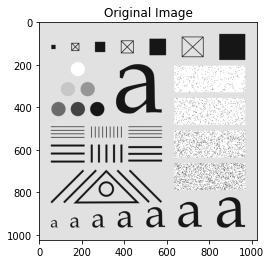

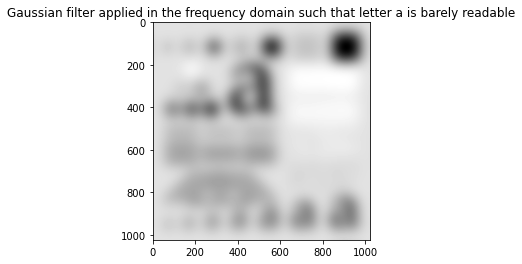

In [1]:
%matplotlib inline
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("testpattern1024.tif", 0)
min = np.minimum(img.shape[0], img.shape[1])
img = cv2.resize(img, (min, min))
M, N = img.shape
fourier_image = np.fft.fft2(img)
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
cutoff = [50, 40, 20, 5]
H1 = np.exp(((-1)*(D**2))/(2*((cutoff[3])**2)))
G1 = H1 * fourier_image
imback1 = np.fft.ifft2(G1)
imback1 = np.uint8(np.real(imback1))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()
plt.imshow(imback1, cmap='gray')
plt.title("Gaussian filter applied in the frequency domain such that letter a is barely readable")
plt.show()


        

### 4.6b) 

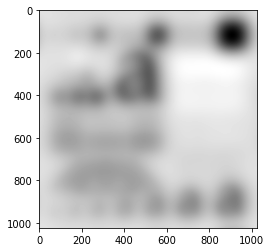

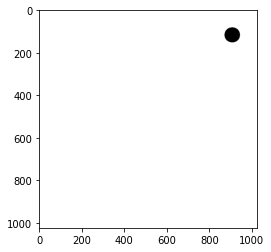

In [2]:
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from PIL import ImageOps, Image
new = np.array(Image.open("testpattern1024.tif"))
def butter_worth(img, n):
    min = np.minimum(img.shape[0], img.shape[1])
    M, N = img.shape
    freq_kernel = np.fft.fft2(img)
    u = np.array(range(0, M))
    v = np.array(range(0, N))
    idx = np.where(u > (M / 2))
    u[idx] = u[idx] - M
    idy = np.where(v > N / 2)
    v[idy] = v[idy] - N
    [V, U] = np.meshgrid(v, u)
    D = (U ** 2 + V ** 2) ** (1 / 2)
    return freq_kernel, D
def Plot(img, n):
    freq_kernel, D = butter_worth(img, n)
    H = 1 / (1 + (D / n) ** 4)
    G = H * freq_kernel
    newimg = np.fft.ifft2(G)
    newimg = np.uint8(np.real(newimg))
    plt.imshow(newimg, cmap='gray')
    plt.show()
    return newimg
def thresold(img, thresold):
    row, col = img.shape[0], img.shape[1]
    for i in range(row):
        for j in range(col):
            if img[i][j] <= thresold:
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img
img2 = Plot(new, 5)
img2 = ImageOps.invert(Image.fromarray(img2))
img2 = np.array(img2)
b = thresold(img2, 170)
plt.imshow(b, "gray")
plt.show()
b = Image.fromarray(b)

### 4.6c)

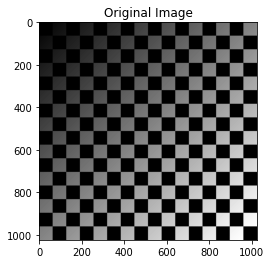

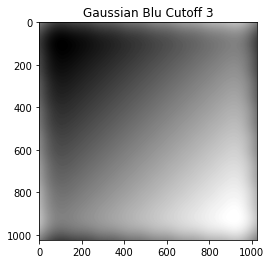

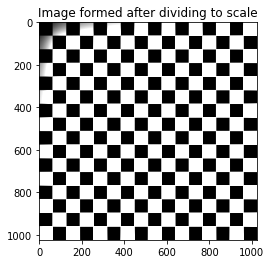

In [17]:
%matplotlib inline
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("checkerboard1024-shaded.tif", 0)
min = np.minimum(img.shape[0], img.shape[1])
img = cv2.resize(img, (min, min))
M, N = img.shape
fourier_image = np.fft.fft2(img)
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
cutoff = [50, 40, 20, 3]
H1 = np.exp(((-1)*(D**2))/(2*((cutoff[3])**2)))
G1 = H1 * fourier_image
imback1 = np.fft.ifft2(G1)
imback1 = np.uint8(np.real(imback1))
pyi=img/imback1
norm=mpl.colors.Normalize(vmin=0, vmax=1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()
plt.imshow(imback1, cmap='gray')
plt.title("Gaussian Blu Cutoff 3")
plt.show()
plt.imshow(pyi, cmap='gray',norm=norm)
plt.title("Image formed after dividing to scale")
plt.show()



### 4.7 a and b)

Have presented two approaches, the first one calculates gausian blur in the frequency domain and finds the mask and adds it. The second method does everything in the frequency domain and finally takes the inverse.

(800, 690)


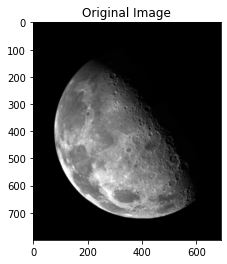

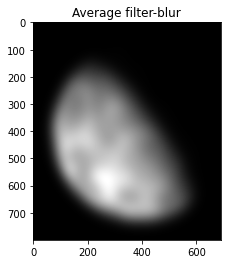

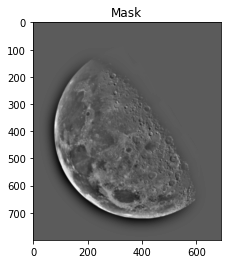

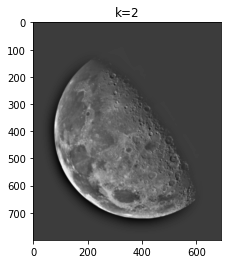

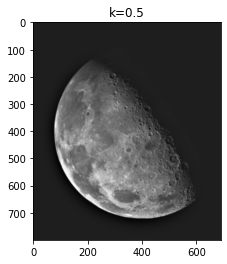

In [28]:
%matplotlib inline
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("blurry-moon.tif", 0)

print(img.shape)
M,N=img.shape
fourier_image = np.fft.fft2(img)
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
cutoff = [50, 40, 20, 5]
H1 = np.exp(((-1)*(D**2))/(2*((cutoff[3])**2)))
G1 = H1 * fourier_image
imback1 = np.fft.ifft2(G1)
imback1 = np.real(imback1)

mask = img - imback1
k = 2
new_weighted = img + k * mask

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()

plt.imshow(imback1, cmap='gray')
plt.title("Average filter-blur")
plt.show()

plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.show()

plt.imshow(new_weighted, cmap='gray')
plt.title("k=2")
plt.show()


k = 0.5
new_weighted = img + k * mask
plt.imshow(new_weighted, cmap='gray')
plt.title("k=0.5")
plt.show()


APPROACH 2

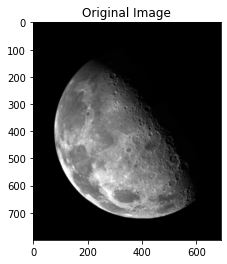

In [16]:
%matplotlib inline
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("blurry-moon.tif", 0)

M, N = img.shape
# computing the 2-d fourier transformation of the image
fourier_image = np.fft.fft2(img)
# ideal low pass filter
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > (N / 2))
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
# cutoff = 40
cutoff = [50, 40, 20, 5]
H1 = np.exp(((-1)*(D**2))/(2*((cutoff[3])**2)))
G1 = (1+1*(1-H1)) * fourier_image
G2 = (1+2*(1-H1)) * fourier_image
imback1 = np.fft.ifft2(G1)
imback1 = np.real(imback1)
imback3 = np.fft.ifft2(G2)

imback3 = np.real(imback3)
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()


        

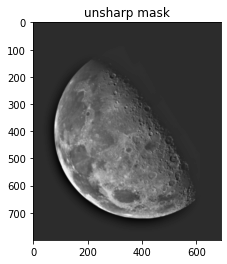

In [15]:
plt.imshow(imback1, cmap='gray')
plt.title("unsharp mask")
plt.show()

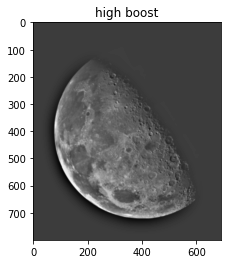

In [14]:

plt.imshow(imback3, cmap='gray')
plt.title("high boost")
plt.show()

Though the background is grey due to changes in the frequency domain, the image is sharper than the original.

### 4.8a)

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


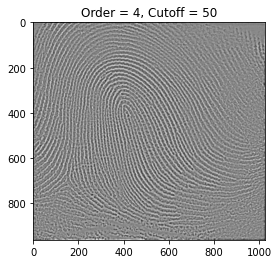

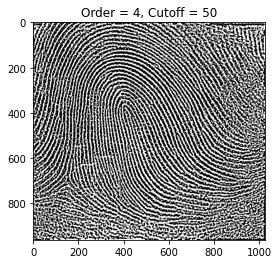

In [5]:
import cv2
import matplotlib as mpl
import numpy as np
img = cv2.imread("Fig0457(a)(thumb_print).tif", 0)

M, N = img.shape
# computing the 2-d fourier transformation of the image
fourier_image = np.fft.fft2(img)
# ideal low pass filter
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = ((U)** 2 + (V) ** 2) ** (1 / 2)

H3 = 1 / (1 +(50/D)**(2*4))
G3 = H3 * fourier_image
imback2 = np.fft.ifft2(G3)
imback2 = np.real(imback2)

plt.imshow(imback2,cmap="gray")
plt.title("Order = 4, Cutoff = 50")
plt.show()

for i in range(len(imback2)):
    for j in range(len(imback2[i])):
        if imback2[i][j]<0:
            imback2[i][j]=0
        else:
            imback2[i][j]=1


plt.imshow(imback2,cmap="gray")
plt.title("Order = 4, Cutoff = 50")
plt.show()


Results achieved using a high pass butterworth filter of order 4 and cutoff 50

### 4.8b)

In [6]:
def laplacianTF4e(P,Q):
    u = np.array(range(0, P))
    v = np.array(range(0, Q))
    idx = np.where(u > (M / 2))
    u[idx] = u[idx] - M
    idy = np.where(v > N / 2)
    v[idy] = v[idy] - N
    [V, U] = np.meshgrid(v, u)
    D = ((U)** 2 + (V)** 2)** (1/2)
    H =-4*((np.pi)**2)*D
    return H

### 4.8c) 

[[3.75301987 3.7546465  3.75640517 ... 3.74893677 3.75016447 3.75152563]
 [3.74725091 3.74890468 3.75068886 ... 3.74307771 3.74433691 3.7457282 ]
 [3.74158805 3.74326927 3.74507959 ... 3.73732343 3.73861464 3.7400363 ]
 ...
 [3.77096201 3.77251025 3.77419501 ... 3.76714261 3.76827762 3.76955099]
 [3.76487549 3.76644936 3.76815831 ... 3.76096929 3.76213489 3.7634371 ]
 [3.7588947  3.7604948  3.76222829 ... 3.7549007  3.75609711 3.75742867]]
1.0
[0.00376945 0.00377109 0.00377285 ... 0.00377134 0.00377254 0.00377388]


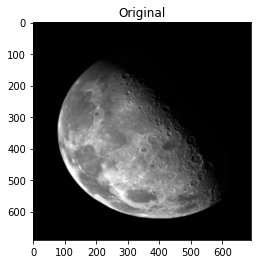

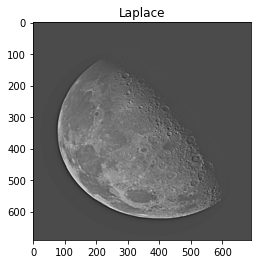

In [7]:
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from PIL import ImageOps
img= cv2.imread("blurry-moon.tif",0)
min = np.minimum(img.shape[0], img.shape[1])
img = cv2.resize(img, (min, min))
img=img/255
M, N = img.shape
fourier_image = np.fft.fft2(img)
H3=laplacianTF4e(M,N)
G3 = H3 * fourier_image
imback2 = np.fft.ifft2(G3)
imback2 = np.real(imback2)
print(imback2)
imback2=imback2/max(imback2.ravel())
final=img+(-1)*imback2

print(max(img.ravel()))
print(imback2.ravel())
plt.title("Original")
plt.imshow(img,cmap="gray")
plt.show()
plt.title("Laplace")

plt.imshow(final,cmap="gray")
plt.show()

There is clear sharpening of the image though the background is grayed(probably due to changes in frequency domain)

### 4.8d)

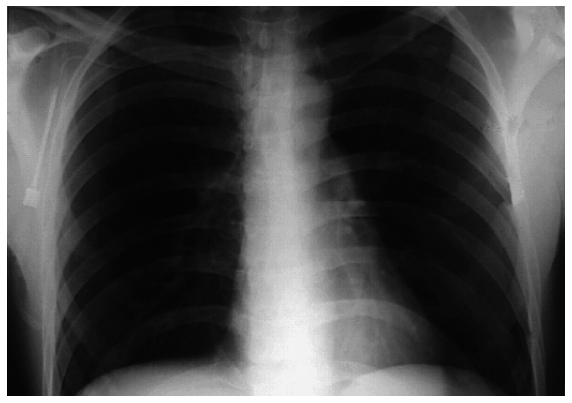

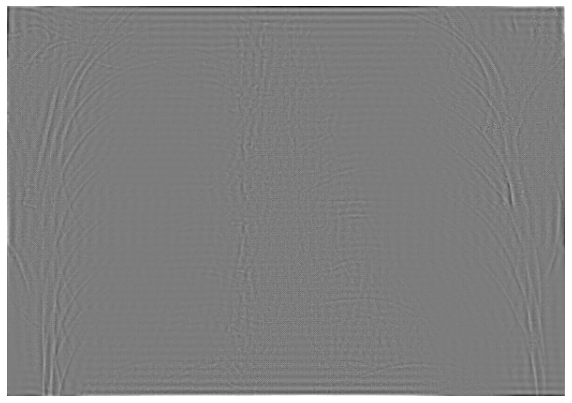

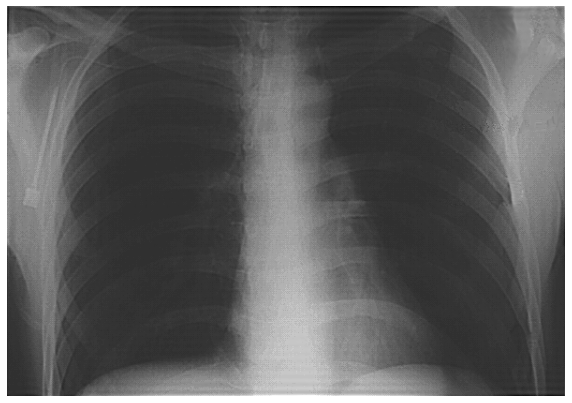

In [8]:
import numpy as np
import matplotlib.pylab as pylab
from PIL import Image 
from scipy import ndimage
import scipy.fftpack as fp
from skimage.io import imread
import matplotlib.pyplot as plt

img = imread("Fig0459(a)(orig_chest_xray).tif")

def HFE(img, freq):
    F1 = fp.fft2((img).astype(float))
    F2 = fp.fftshift(F1)
    (w, h) = img.shape
    half_w, half_h = int(w/2), int(h/2)
    F2[half_w-freq:half_w+freq+1,half_h-freq:half_h+freq+1] = 0
    im1 = fp.ifft2(fp.ifftshift(F2)).real
    return im1

def plot(img, freq):
    image = HFE(img, freq)
    new = image + img
    plt.figure(figsize=(10,10)), plt.imshow(img, cmap='gray'), plt.axis("off"), plt.show()
    plt.figure(figsize=(10,10)), plt.imshow(image, cmap='gray'), plt.axis("off"), plt.show()
    plt.figure(figsize=(10,10)), plt.imshow(new, cmap="gray"), plt.axis('off'), plt.show()
    
plot(img, 50)


As we can see, the rib bones are much more sharper now.